In [45]:
import numpy as np
import matplotlib.pyplot as plt
from methods.helpers import random_matrix, random_vector, proj_pos_orthant

def f_i(x, i):
    min_val = np.inf
    min_j = -1
    for j in range(N):
        if min_val > A[i, j]+x[j]*P[i, j]:
            min_val = A[i, j]+x[j]*P[i, j]
            min_j = j
    obj = A[i, min_j]+x[min_j]*P[i, min_j] - float(np.dot(T, x)/M)
    return (obj, min_j)
    

def f(x):
    obj = 0
    for i in range(M):
        obj_i, _ = f_i(x, i)
        obj += obj_i
    return obj


def g_i(i, min_j):
    subgrad = []
    for j in range(N):
        if j == min_j:
            subgrad.append(P[i, j] - T[j]/M)
        else:
            subgrad.append(-T[j]/M)
    return np.array(subgrad)


N = 4
M = 100
t_bar = 0.5

A = random_matrix(M, N)
P = random_matrix(M, N)
T = []
# MAKES TIME VECTOR
for j in range(N):
    j_time = 0
    for i in range(M):
        j_time += P[i, j]
    T.append(t_bar*j_time/N)

T = np.array(T)

In [46]:
def constant_step(k):
    return 0.01

def diminishing_step(k):
    return 0.01/(k+1)

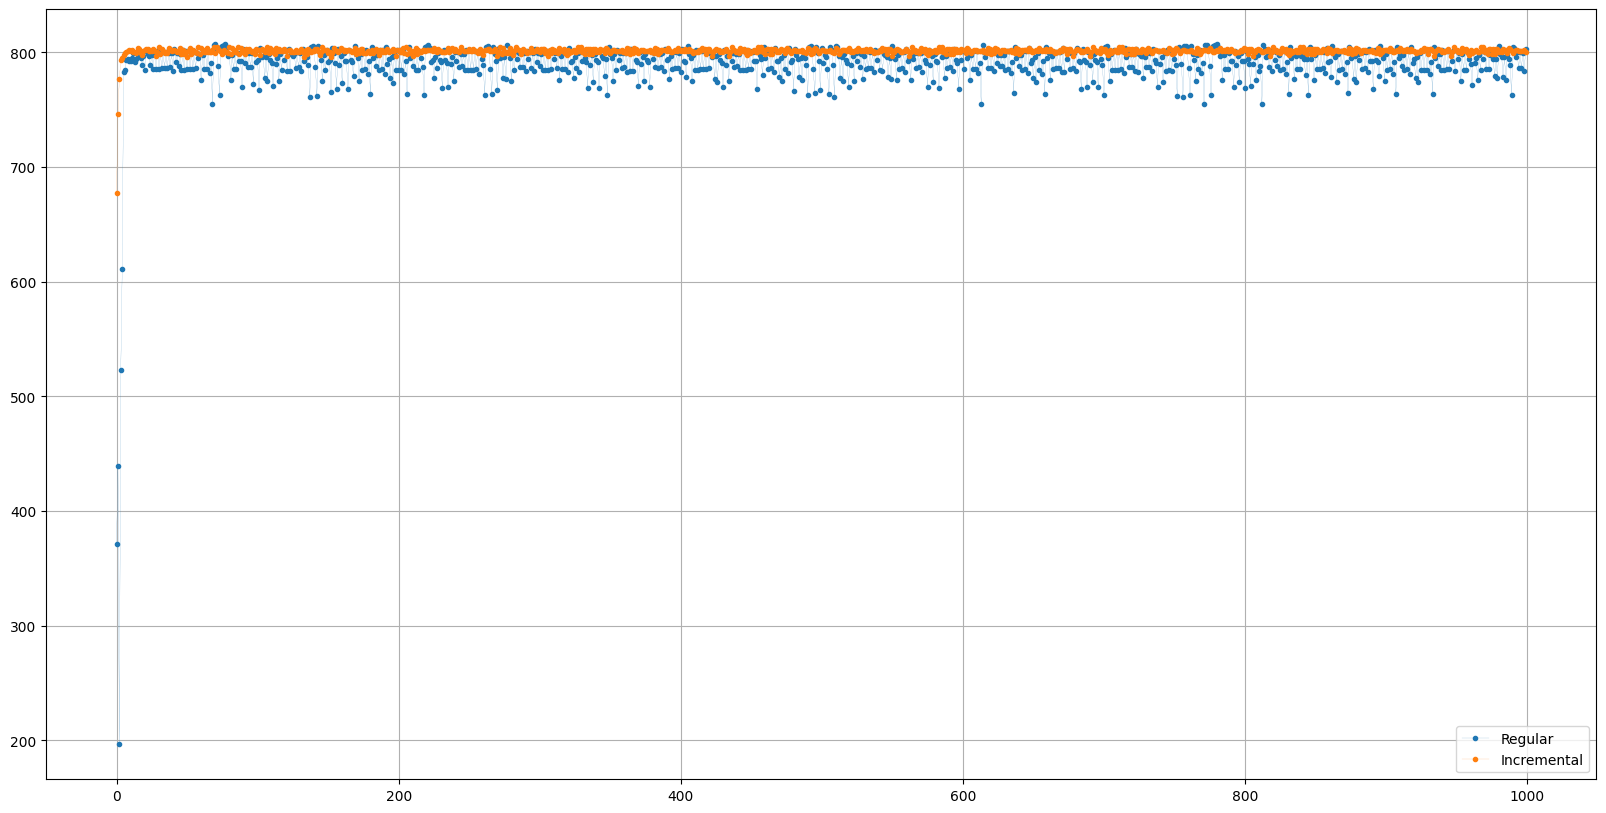

In [47]:

MAX_ITERATION = 1000 # multiples of N
X0 = np.array([0,0,0,0])
iteration = 0
x_curr = X0
objectives_reg = []
objectives_increment = []

# REGULAR SUBGRADIENT
for _ in range(MAX_ITERATION):
    # compute f 
    iteration += 1
    obj = 0
    subgradient = np.zeros(N)
    for i in range(M):
        obj_i, min_j = f_i(x_curr, i)
        subgradient += g_i(i, min_j)
        obj += obj_i
    x_curr = proj_pos_orthant(x_curr + constant_step(iteration)*subgradient)
    objectives_reg.append(obj)


iteration = 0
x_curr = X0
# INCREMENTAL SUBGRADIENT
for _ in range(MAX_ITERATION):
    iteration += 1
    for i in range(M):
        _, min_j = f_i(x_curr, i)
        subgradient = g_i(i, min_j)
        x_curr = proj_pos_orthant(x_curr + constant_step(iteration)*subgradient)
    objectives_increment.append(f(x_curr))

x = range(MAX_ITERATION)
y_reg = objectives_reg
y_increment = objectives_increment
plt.figure(figsize=(20, 10))
plt.plot(x, y_reg, linewidth = 0.1, marker='.', label='Regular')
plt.plot(x, y_increment, linewidth = 0.1, marker='.', label='Incremental')
plt.grid()
plt.legend()
plt.savefig("hello.png")